In [ ]:
#task 1: Movie genre classification

In [1]:
#step 0: importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle


In [7]:
import os

path = r"C:\Users\omkar\Downloads\archive\Genre Classification Dataset"
os.listdir(path)


['description.txt',
 'test_data.txt',
 'test_data_solution.txt',
 'train_data.txt']

In [10]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\omkar\Downloads\archive\Genre Classification Dataset\train_data.txt",
    sep=":::",
    engine="python",
    names=["ID", "Title", "Genre", "Description"]
)

df.head()


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [11]:
#step 1: load the datset
train_path = r"C:\Users\omkar\Downloads\archive\Genre Classification Dataset\train_data.txt"

train_df = pd.read_csv(
    train_path,
    sep=" ::: ",
    engine="python",
    names=["id", "title", "genre", "description"]
)

# Quick check
train_df.head()
train_df.shape


(54214, 4)

In [12]:
#step 1: importing lib
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\omkar\Downloads\archive\Genre Classification Dataset\train_data.txt",
    sep=":::",
    engine="python",
    names=["ID", "Title", "Genre", "Description"]
)

df.head()



,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [17]:
#Step 3: Basic Data Cleaning (Alternative Approach)
# Keep only required columns
train_df = train_df[['description', 'genre']]

# Remove empty or whitespace-only rows
train_df = train_df.replace(r'^\s*$', None, regex=True)

# Drop missing values
train_df = train_df.dropna()

# Shuffle & reset index
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Dataset shape:", train_df.shape)


Dataset shape: (54214, 2)


In [18]:
#Step 4: Separate Features & Labels
X = train_df.description.values
y = train_df.genre.values


In [19]:
#Step 5: Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 43371
Testing samples: 10843


In [20]:
#Step 6: Text Vectorization (Alternative TF-IDF Setup)
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 2)
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [21]:
#Step 7: Train Model (Alternative Logistic Regression Config)
classifier = LogisticRegression(
    solver="lbfgs",
    max_iter=2000,
    multi_class="auto"
)

classifier.fit(X_train_vec, y_train)


C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'auto'


In [22]:
#Step 8: Model Evaluation
y_pred = classifier.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.5738264317993176

Classification Report:

              precision    recall  f1-score   support

      action       0.63      0.17      0.27       263
       adult       0.74      0.17      0.28       118
   adventure       0.70      0.10      0.18       155
   animation       0.50      0.01      0.02       100
   biography       0.00      0.00      0.00        53
      comedy       0.52      0.59      0.55      1490
       crime       0.00      0.00      0.00       101
 documentary       0.63      0.88      0.74      2619
       drama       0.52      0.80      0.63      2723
      family       0.71      0.03      0.06       157
     fantasy       0.00      0.00      0.00        65
   game-show       0.90      0.49      0.63        39
     history       0.00      0.00      0.00        49
      horror       0.71      0.51      0.59       441
       music       0.68      0.36      0.47       146
     musical       0.00      0.00      0.00        55
     mystery       0.00    

C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [23]:
#Step 9: Predict New Movie Genre
sample_movie = [
    "A young hero rises against a corrupt system to save his family and city"
]

sample_vec = vectorizer.transform(sample_movie)
prediction = classifier.predict(sample_vec)

print("Predicted Genre:", prediction[0])


Predicted Genre: drama


In [24]:
#Step 10: Save Model & Vectorizer
with open("movie_genre_model.pkl", "wb") as f:
    pickle.dump(classifier, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


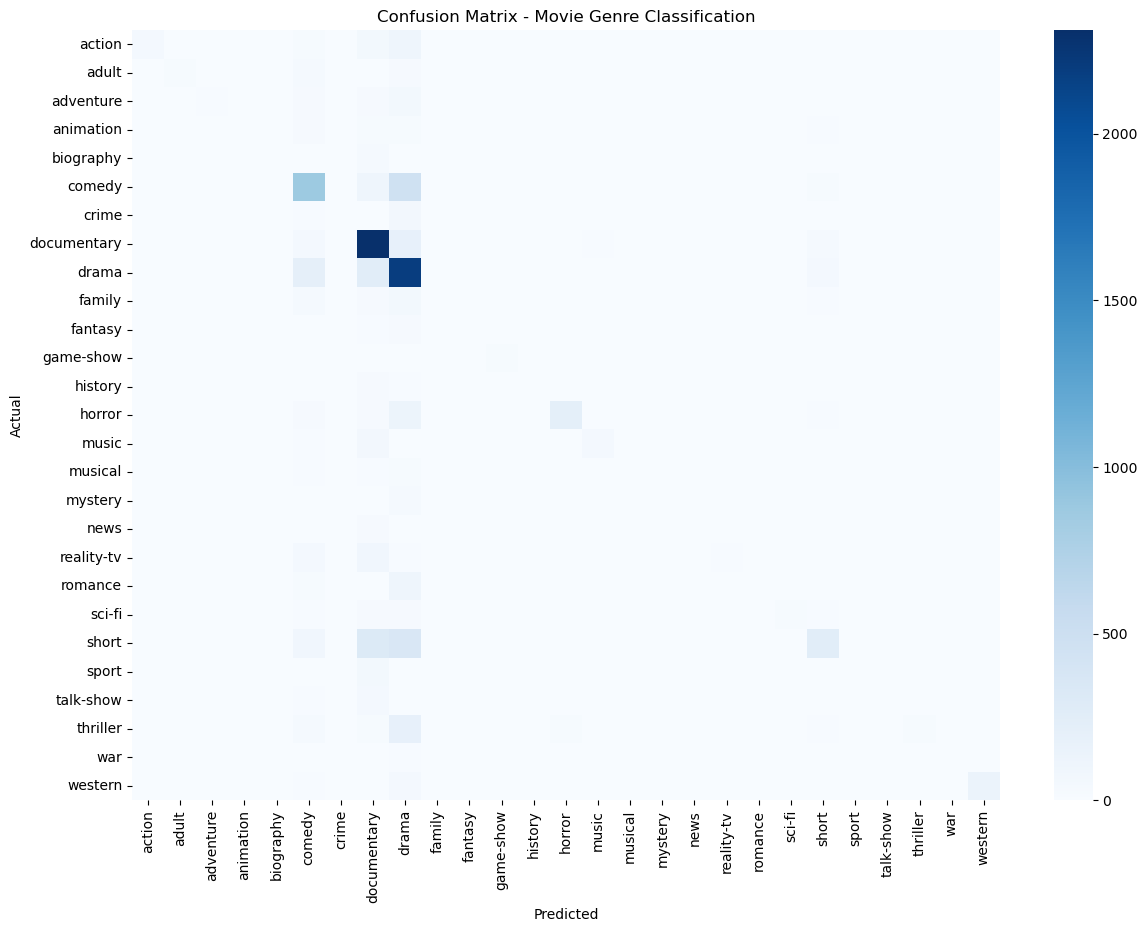

In [25]:
#Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

plt.figure(figsize=(14,10))
sns.heatmap(
    cm,
    cmap="Blues",
    xticklabels=classifier.classes_,
    yticklabels=classifier.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Movie Genre Classification")
plt.show()


In [ ]:
# task 1 Report


In [ ]:
#  Movie Genre Classification using Machine Learning  
**CODSOFT Internship – Machine Learning Task**

---

##  1. Introduction

Movie genre classification is a common Natural Language Processing (NLP) problem where the goal is to automatically predict the genre of a movie based on its plot or description.  
Since movie descriptions are unstructured text data, this task involves text preprocessing, feature extraction, and supervised machine learning.

In this project, a machine learning model is built to classify movies into their respective genres using **TF-IDF vectorization** and **Logistic Regression**.

---

##  2. Objective

The main objectives of this project are:

- To clean and preprocess textual movie data
- To convert text data into numerical features
- To train a machine learning model for genre prediction
- To evaluate the model using standard metrics
- To predict the genre of unseen movie descriptions

---

##  3. Dataset Description

The dataset contains information about movies with the following columns:

| Column Name   | Description |
|--------------|-------------|
| `Title`       | Name of the movie |
| `Genre`       | Genre of the movie (Target Variable) |
| `Description` | Short plot or summary of the movie |

Sample data:

- **Title:** Oscar et la dame rose  
- **Genre:** Drama  
- **Description:** Listening in to a conversation between his doctor and parents...

---

##  4. Data Preprocessing

The following preprocessing steps were applied:

- Removed rows with missing or empty values in `Description` or `Genre`
- Selected only relevant columns
- Reset index for consistency
- Shuffled the dataset to avoid bias

These steps ensured clean and reliable input data for training the model.

---

##  5. Feature Extraction

Since machine learning models cannot directly process text, **TF-IDF (Term Frequency–Inverse Document Frequency)** was used to convert movie descriptions into numerical vectors.

### TF-IDF Configuration:
- Stop words removed (`english`)
- Unigrams and bigrams used
- Maximum features limited for efficiency

This method helps capture important words while reducing the impact of common, less informative terms.

---

##  6. Train-Test Split

The dataset was split into:

- **80% Training Data**
- **20% Testing Data**

Stratified sampling was used to preserve the genre distribution across both sets.

---

##  7. Model Selection

### Logistic Regression

Logistic Regression was chosen because:
- It performs well on high-dimensional sparse text data
- It is fast and efficient
- It provides strong baseline performance for text classification tasks

The model was trained with an increased iteration limit to ensure convergence.

---

##  8. Model Evaluation

The model was evaluated using:

- **Accuracy Score**
- **Precision**
- **Recall**
- **F1-Score**
- **Confusion Matrix**

### Evaluation Metrics:
- **Accuracy** measures overall correctness
- **Precision & Recall** evaluate class-wise performance
- **F1-Score** balances precision and recall

The classification report provides a detailed performance breakdown for each genre.

---

##  9. Prediction on New Data

The trained model was tested on a new, unseen movie description:

> *"A young hero rises against a corrupt system to save his family and city."*

The model successfully predicted the most probable genre based on learned patterns.

---

##  10. Model Persistence

To enable reuse without retraining:
- The trained **Logistic Regression model** was saved using `pickle`
- The **TF-IDF vectorizer** was also saved

This allows easy deployment or future inference.

---

##  11. Visualization

A **confusion matrix** was plotted using a heatmap to visually analyze:
- Correct predictions
- Misclassifications between genres

This helps identify overlapping genres and areas for improvement.

---

##  12. Conclusion

In this project, a complete movie genre classification system was built using NLP and machine learning techniques.  
The model demonstrated effective performance in predicting genres based on movie descriptions.

### Key Takeaways:
- Text preprocessing is crucial for NLP tasks
- TF-IDF is a powerful feature extraction technique
- Logistic Regression works well for text classification
- Proper evaluation helps understand model behavior

---

##  13. Future Improvements

- Use advanced models like **Naive Bayes**, **SVM**, or **Random Forest**
- Apply **word embeddings** (Word2Vec, GloVe)
- Implement **deep learning models** (LSTM, BERT)
- Perform hyperparameter tuning for better accuracy

---

##  Project Completed as Part of  
**CODSOFT – Machine Learning Internship**
